<a href="https://colab.research.google.com/github/Ninaad1007/Weight-Detection-using-Pills-Images/blob/main/Pill_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Input Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
#os.listdir('https://drive.google.com/drive/folders/1CNRIVuKOHhzV6nLJ6_wAxciBMz8S5XxZ')

In [3]:
import cv2
import numpy as np
import pandas as pd

In [4]:
path = 'drive/MyDrive/Pills dataset/pills detection project'
data = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    height, width, channels = img.shape
    size = os.path.getsize(os.path.join(path, filename))
    ty = img.dtype
    data.append([filename, size, width, height, channels,ty])
    

df = pd.DataFrame(data, columns=['filename', 'size', 'width', 'height', 'channels','ty'])
df.head()

,filename,size,width,height,channels,ty
0,IMG-20230327-WA0058.jpg,15269,1392,928,3,uint8
1,IMG-20230327-WA0057.jpg,15122,1392,928,3,uint8
2,IMG-20230327-WA0056.jpg,15062,1392,928,3,uint8
3,IMG-20230327-WA0055.jpg,15024,1392,928,3,uint8
4,IMG-20230327-WA0054.jpg,15161,1392,928,3,uint8


In [5]:
# Define the path to your image directory
path = 'drive/MyDrive/Pills dataset/pills detection project'

# Create empty lists to store your original and filtered images
org = []
images = []

# Loop through all the files in your image directory
for filename in os.listdir(path):
    # Load each image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    #img = cv2.resize(img, (10000, 10000))
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur with a 5x5 kernel
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # Define a sharpening kernel
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    # Apply the sharpening kernel
    sharpened = cv2.filter2D(blur, -1, kernel)

    # Add the original and sharpened images to their respective lists
    org.append(gray)
    images.append(sharpened)

In [ ]:
#TOO MUCH TIME, NOT OPTIMIZED
from tqdm import tqdm
# Define the path to your image directory
path = 'drive/MyDrive/Pills dataset/pills detection project'

# Create empty lists to store your original and filtered images
org = []
images = []
segmented_images = []

# Loop through all the files in your image directory
for filename in tqdm(os.listdir(path)):
    # Load each image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    #img = cv2.resize(img, (10000, 10000))
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Median filter
    #blur = cv2.medianBlur(gray, 5)
    # Apply an adaptive median filter with a 5x5 kernel
    #adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Apply a Gaussian blur with a 5x5 kernel
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply Bilateral filter
    #bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    # Define a sharpening kernel
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    # Apply the sharpening kernel
    sharpened = cv2.filter2D(blur, -1, kernel)
    # Perform img segmentation using grabCut
    mask = np.zeros(sharpened.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (10, 10, sharpened.shape[1]-40, sharpened.shape[0]-40)
    cv2.grabCut(sharpened, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented = sharpened * mask2[:, :, np.newaxis]

    # Add the original, sharpened, and segmented images to their respective lists
    org.append(gray)
    images.append(sharpened)
    segmented_images.append(segmented)

100%|██████████| 44/44 [00:05<00:00,  8.76it/s]


In [ ]:
#leave
from tqdm import tqdm
# Define the path to your image directory
path = 'drive/MyDrive/Pills dataset/pills detection project'

# Create empty lists to store your original and filtered images
org = []
images = []
segmented_images = []

# Loop through all the files in your image directory
for filename in tqdm(os.listdir(path)):
    # Load each image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    #img = cv2.resize(img, (10000, 10000))
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Median filter
    #blur = cv2.medianBlur(gray, 5)
    # Apply an adaptive median filter with a 5x5 kernel
    #adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Apply a Gaussian blur with a 5x5 kernel
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply Bilateral filter
    #bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    # Define a sharpening kernel
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    # Apply the sharpening kernel
    sharpened = cv2.filter2D(blur, -1, kernel)
    
    # Perform watershed segmentation on the sharpened image
    thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[markers != 1] = 255
    segmented = cv2.bitwise_and(sharpened, sharpened, mask=mask)

    # Add the original, sharpened, and segmented images to their respective lists
    org.append(gray)
    images.append(sharpened)
    segmented_images.append(segmented)

    # Add the original, sharpened, and segmented images to their respective lists
    org.append(gray)
    images.append(sharpened)
    segmented_images.append(segmented)

In [6]:
#INVERTED ONE #RUNNING ONE
from tqdm import tqdm
import cv2
import os
import numpy as np

# Define the path to your image directory
path = 'drive/MyDrive/Pills dataset/pills detection project'

# Create empty lists to store your original and filtered images
org = []
images = []
segmented_images = []

# Loop through all the files in your image directory
for filename in tqdm(os.listdir(path)):
    # Load each image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    
    # Invert the colors of the image
    inverted_img = cv2.bitwise_not(img)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)
    
    # Apply a Gaussian blur with a 5x5 kernel
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Define a sharpening kernel
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    # Apply the sharpening kernel
    sharpened = cv2.filter2D(blur, -1, kernel)
    
    # Perform watershed segmentation on the sharpened image
    thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0
    markers = cv2.watershed(inverted_img,markers)
    inverted_img[markers == -1] = [255,0,0]
    mask = np.zeros(inverted_img.shape[:2], np.uint8)
    mask[markers != 1] = 255
    segmented_inverted = cv2.bitwise_and(sharpened, sharpened, mask=mask)
    
    # Invert the colors of the segmented image back
    segmented = cv2.bitwise_not(segmented_inverted)
    
    # Add the original, sharpened, and segmented images to their respective lists
    org.append(img)
    images.append(sharpened)
    segmented_images.append(segmented)

100%|██████████| 44/44 [00:02<00:00, 15.37it/s]


In [ ]:
# WORKING OKAY
from tqdm import tqdm
import cv2
import numpy as np
import os

# Define the path to your image directory
path = 'drive/MyDrive/Pills dataset/pills detection project'

# Create empty lists to store your original and filtered images
org = []
images = []
segmented_images = []

# Loop through all the files in your image directory
for filename in tqdm(os.listdir(path)):
    # Load each image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    #img = cv2.resize(img, (10000, 10000))
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Median filter
    #blur = cv2.medianBlur(gray, 5)
    # Apply an adaptive median filter with a 5x5 kernel
    #adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Apply a Gaussian blur with a 5x5 kernel
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply Bilateral filter
    #bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    # Define a sharpening kernel
    kernl = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    # Apply the sharpening kernel
    sharpened = cv2.filter2D(blur, -1, kernl)
    # Threshold the image to segment the white part of the pill
    _, thresh = cv2.threshold(sharpened, 200, 255, cv2.THRESH_BINARY)
    
    # Perform morphological operations to remove noise and fill in small gaps
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    
    # Perform image segmentation on the sharpened and filtered image
    segmented = cv2.bitwise_and(img, img, mask=closing)
    
    # Add the original and segmented images to their respective lists
    org.append(gray)
    images.append(sharpened)
    segmented_images.append(segmented)

100%|██████████| 44/44 [00:00<00:00, 49.67it/s]


In [7]:
import pickle

# Define the filename for the pickle file
filename = 'segmented_images.pkl'

# Store the list of segmented images in the pickle file
with open(filename, 'wb') as file:
    pickle.dump(segmented_images, file)

# Load the pickled list of segmented images
with open(filename, 'rb') as file:
    segmented_images = pickle.load(file)

Average PSNR: 41.98108975013711 {gaussian blur}, edge sharpening changes - 48.7
Average PSNR: 40.09666528096421 {median blur}
Average PSNR: 40.332116018048644 {bilateral filter}
adaptive median 
Average accuracy: 0.1890158317404753
Average PSNR: 1.4922491009300627
Average MSE: 126.70013779830674
Average ASNR: -21.02708945844398


In [ ]:
accuracy_list = []
psnr_list = []
mse_list = []
asnr_list = []

for i in range(len(org)):
    accuracy = cv2.norm(org[i], images[i], cv2.NORM_L2) / (org[i].shape[0] * org[i].shape[1])
    accuracy_list.append(accuracy)
    # Calculate PSNR
    psnr = cv2.PSNR(org[i], images[i])
    psnr_list.append(psnr)

    # Calculate MSE
    mse = np.square(np.subtract(org[i], images[i])).mean()
    mse_list.append(mse)

    # Calculate ASNR
    asnr = 10 * np.log10(np.mean(np.square(images[i])) / mse)
    asnr_list.append(asnr)

# Calculate PSNR, MSE, and ASNR
average_psnr = sum(psnr_list) / len(psnr_list)
average_mse = sum(mse_list) / len(mse_list)
average_asnr = sum(asnr_list) / len(asnr_list)

print("Average PSNR:", average_psnr)
print("Average MSE:", average_mse)
print("Average ASNR:", average_asnr)


Average PSNR: 49.95651043673827
Average MSE: 0.6184778658500882
Average ASNR: 23.10982146679946


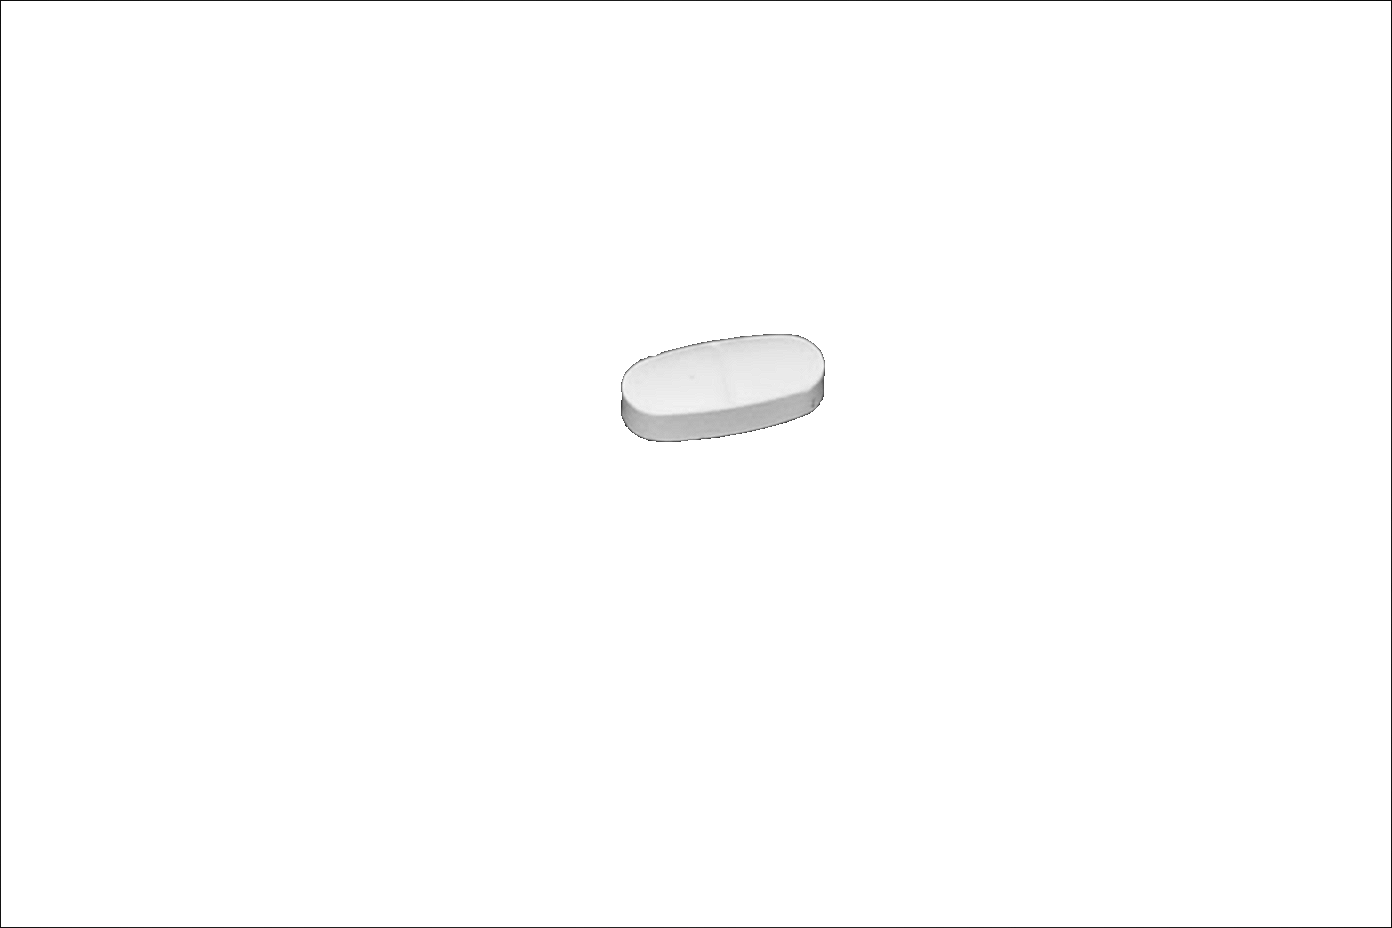

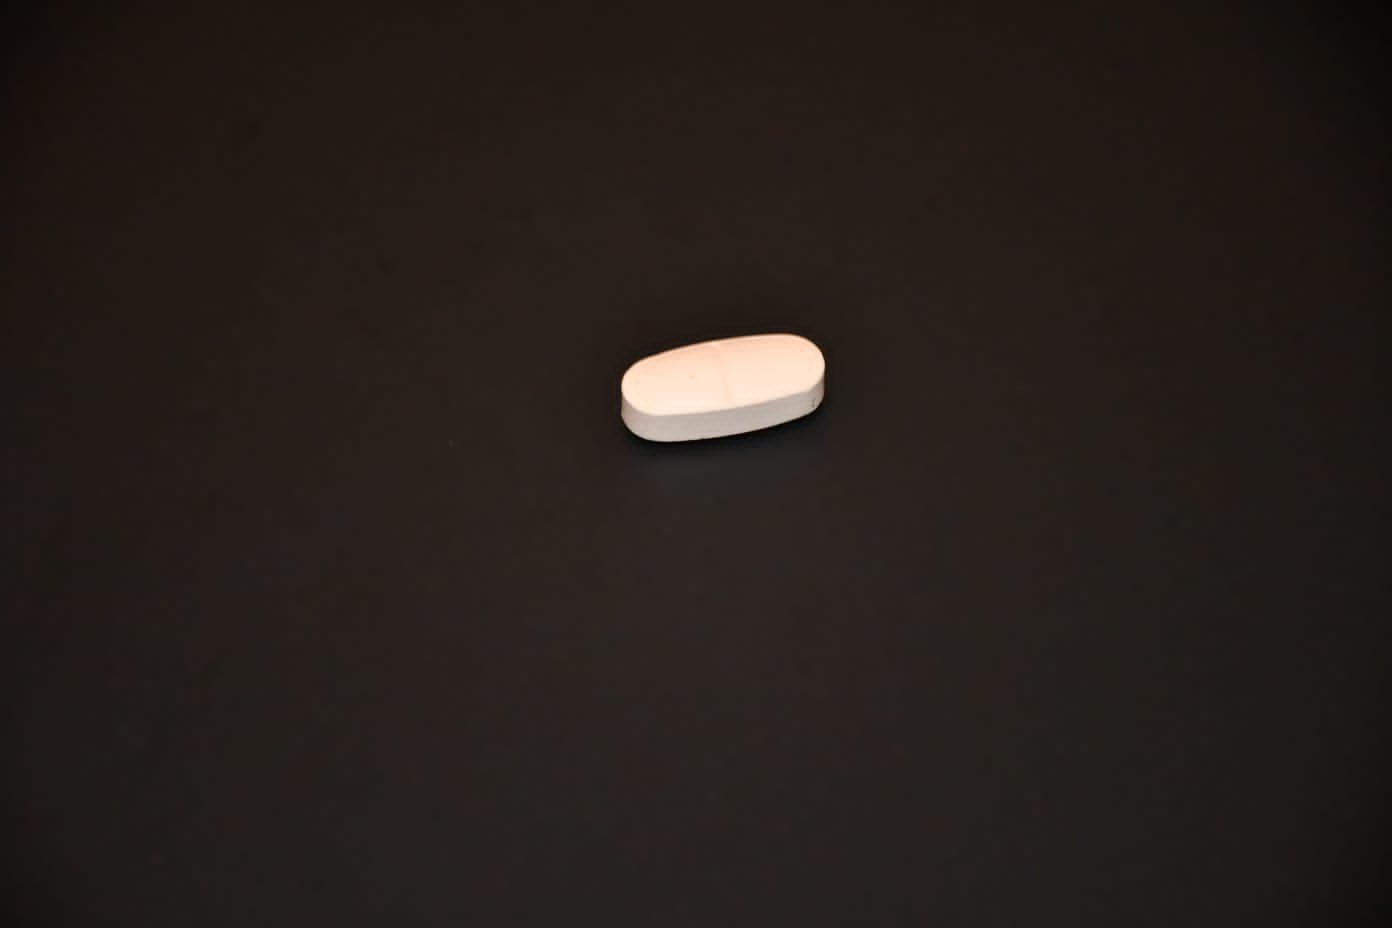

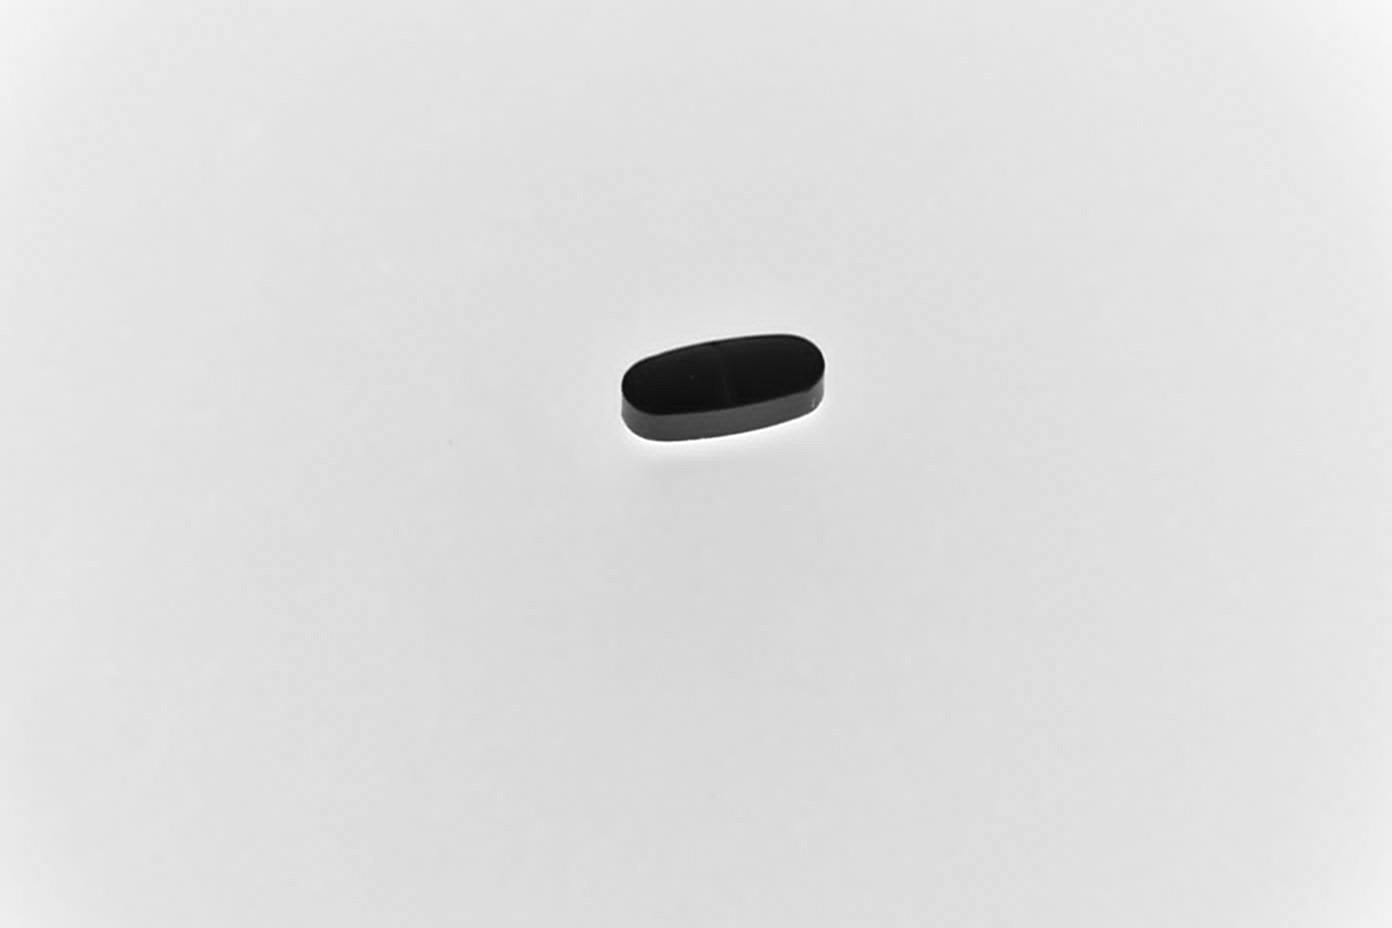

In [ ]:
from google.colab.patches import cv2_imshow

img1 = segmented_images[1]
img3 = images[1]
img2 = org[1]
# Display your image
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
# Wait for a key press
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

In [12]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import pickle
import pandas as pd
from PIL import Image

# Define the filename for the pickle file
filename = 'segmented_images.pkl'

# Load the pickled list of segmented images
with open(filename, 'rb') as file:
    segmented_images = pickle.load(file)

# Define the transform to apply to each image
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert image to RGB
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.fc = torch.nn.Identity()  # Remove the last fully connected layer
model.eval()

# Create an empty list to store the extracted features
features = []

# Loop through each segmented image
for segmented_img in segmented_images:
    # Convert the segmented image to PIL Image
    img = Image.fromarray(segmented_img)

    # Apply the transform to the image
    img = transform(img)

    # Move the image to the GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    img = img.to(device)

    # Extract features from the image using the pre-trained model
    with torch.no_grad():
        features.append(model(img.unsqueeze(0)).squeeze().cpu().numpy())

# Convert the list of extracted features to a pandas DataFrame
df_features = pd.DataFrame(features)

# Print the DataFrame
print(df_features)

        0         1         2         3         4         5         6     \
0   0.672046  0.303708  0.056931  0.364897  0.261658  0.281031  0.216723   
1   0.586179  0.293391  0.313102  0.252553  0.264107  0.154309  0.251515   
2   0.203774  0.321128  0.009448  0.245554  0.294497  0.241310  0.252197   
3   0.575792  0.620330  0.024539  0.124652  0.174120  0.813392  0.252264   
4   0.239206  0.675596  0.009298  0.293029  0.234406  1.172196  0.263070   
5   0.199104  0.597080  0.070536  0.299139  0.208550  0.518677  0.213187   
6   0.197702  0.163493  0.009385  0.344603  0.176447  0.436660  0.990725   
7   0.450585  0.714182  0.188200  0.307650  0.669321  0.677302  0.313406   
8   0.008599  0.463540  0.009926  0.270548  0.149324  1.144218  0.273179   
9   0.353491  0.943045  0.078180  0.367949  0.653004  0.837545  0.427270   
10  0.195200  0.864214  0.032156  0.104386  0.195648  0.762620  0.296075   
11  0.110286  0.546925  0.009585  0.230123  0.180326  0.557117  0.688570   
12  0.115095